In [1]:
import numpy as np
from math import log2
import matplotlib.pyplot as plt


treeNode=dict(boxstyle="round4",fc="0.8") #style of the bubble around the nodes
arrows=dict(arrowstyle="<-") #type of arrows 

##################
#function to draw the node bubble with the text
##################
def draw_node(nodeText,centerPt,parentPt,nodeType):
    display_tree.ax1.annotate(nodeText,xy=parentPt,xycoords='axes fraction',xytext=centerPt, va='bottom',ha='center',bbox=nodeType,arrowprops=arrows)

In [2]:
def entropy(roomData):
    H=0.0
    i=0
    scoreboard = {1:0, 2:0, 3:0, 4:0}
    size = len(roomData)
    while i<size:
        if roomData[i][-1] == 1:
            scoreboard[1]+=1
        elif roomData[i][-1] == 2:
            scoreboard[2]+=1
        elif roomData[i][-1] == 3:
            scoreboard[3]+=1
        elif roomData[i][-1] == 4:
            scoreboard[4]+=1
        i+=1;
    for i in (1,2,3,4):
        if scoreboard[i] > 0:
            H += ((-scoreboard[i])/size)*(log2(scoreboard[i]/size))
    return H

In [3]:
def InfoGain(All, Left, Right):
    H_SAll=entropy(All)
    Total=len(Left)+len(Right)
    Remainder=((len(Left)/Total)*entropy(Left))+((len(Right)/Total)*entropy(Right))
    Gains=H_SAll-Remainder
    return Gains

In [4]:
def FIND_SPLIT(d):
    emitter = 0
    value = 0
    max_info_gain = 0
    for x in range(len(d[0])-2):
        #d.sort(d,key = lambda y: y[x])
        ds = np.array(sorted(d, key = lambda y: y[x], reverse=True))
        for r in range(len(ds)):
            
            split_point = ds[r][x]
            if(r!=len(ds)-1 and ds[r+1][x] == split_point):
                continue
            info_gain = InfoGain(ds, ds[:r+1],ds[r+1:])
            
            if(info_gain > max_info_gain):
                emitter = x
                value = split_point
                max_info_gain = info_gain
    return emitter, value

In [5]:
def split(clean_rows):
    Left = []
    Right = []
    em, val = FIND_SPLIT(clean_rows) #splitvalue[0] = emitter and splitvalue[1] = value under that column
    for i in range(len(clean_rows)):
        if(clean_rows[i][em] >= val):
            Left.append(clean_rows[i])
        else:
            Right.append(clean_rows[i])
    return np.array(Left),np.array(Right),em,val

In [6]:
def tree_learning(training_data, depth):
    if(entropy(training_data) == 0):
        label = training_data[0][-1]
        leaf = {'emitter':None, 'value':None, 'room': label, 'right':None, 'left':None}
        return leaf, depth
    else:
        ldata, rdata, em, val = split(training_data)
        root = {'emitter': em, 'value': val, 'room': None, 'right':None, 'left':None}
        root['left'], l_depth = tree_learning(ldata, depth+1)
        root['right'], r_depth = tree_learning(rdata, depth+1)
        return root, max(l_depth, r_depth)

In [7]:
# return the number of leaves in the tree
def countLeaf(tree):
    if(tree is None):
        return 0
    if(tree['left'] == None and tree['right'] == None): 
        return 1
    else:
        return countLeaf(tree['left']) + countLeaf(tree['right'])

# return the depth of the tree
def maxheight(tree):
    if(tree is None):
        return 0
    else:
        leftheight = maxheight(tree['left'])
        rightheight = maxheight(tree['right'])
        
        if(leftheight > rightheight):
            return leftheight +1
        else:
            return rightheight +1
        
        

In [8]:
##########################
#function that recursively traverses the tree and calls draw_node to print out nodes and arrows
##########################

def draw_tree(root, parentPt):
    if (root is None):
        return
    leaf_num = countLeaf(root)  
    height = maxheight(root)    
    cntrPt = (draw_tree.x + (1.0 + float(leaf_num))/2.0/draw_tree.total_width, draw_tree.y) #determines the x and y coordinates for the node
    draw_tree.y = (draw_tree.y - 1.0/draw_tree.total_depth)  # y coordinate for the next level of the tree
    
    if (root['right'] != None and root['left'] != None):  #for non leaf nodes
        textInNode=str('X <' + str(root['value'])+'\n'+ str(root['emitter']))  #text that is supposed to be in the node
        draw_node(textInNode, cntrPt, parentPt, treeNode)
        draw_tree(root['left'], cntrPt)
        draw_tree(root['right'], cntrPt)        
        
    else:   #it's a leaf node print the leaf node
        textInNode=str(root['room'])   #text that is supposed to be in the leaf node
        draw_tree.x = (draw_tree.x + 1.0/draw_tree.total_width)  # x coordinate for the new node
        draw_node(textInNode, cntrPt, parentPt, treeNode) 
    draw_tree.y = (draw_tree.y + 1.0/draw_tree.total_depth)  # y coord for the next level of the tree

In [9]:
#########################
#function that creates an empty plot and defines some constants for the draw_tree function and then calls draw_tree 
#####################
def display_tree(root):
    fig=plt.figure(1,facecolor='white')  # new figure
    
    axprops=dict(xticks=[],yticks=[])  #without the x and y major and minor ticks 
    display_tree.ax1=plt.subplot(111,frameon=False,**axprops) #create a subplot without the x y axesa and without ticks 
    draw_tree.total_width=float(0.3*countLeaf(root))  #constant used in the draw_tree 
    draw_tree.total_depth=float(0.3*maxheight(root))  #
    draw_tree.x=-0.5/draw_tree.total_width  # x coordinates
    draw_tree.y=1.0  #y coordinates
    draw_tree(root,(0.5,2.0))
    plt.savefig('out.png', bbox_inches='tight')  #output the figure to a png
    plt.show()
    plt.close(fig)
    

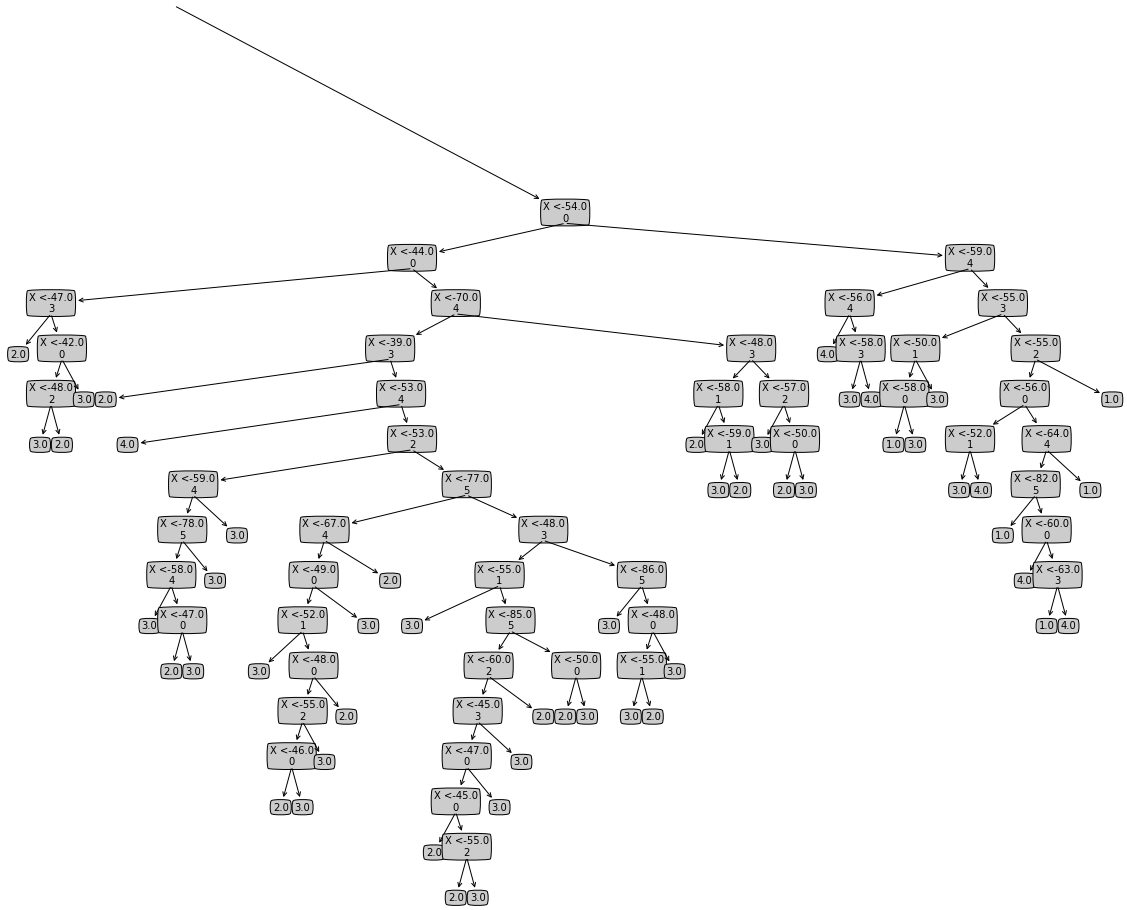

In [10]:
clean_rows = np.loadtxt("clean_dataset.txt")
t, d = tree_learning(clean_rows, 0)

display_tree(t)